# Green taxi

In [1]:
import io
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%cd "D:\Imarticus\stat\taxi dataset"

D:\Imarticus\stat\taxi dataset


In [3]:
!pip install pyarrow
#arrow is the library to access parquet files

In [4]:
greentaxi=pd.read_parquet('green_tripdata_2023-05.parquet',engine='pyarrow')

In [5]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69174 entries, 0 to 69173
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               69174 non-null  int32         
 1   lpep_pickup_datetime   69174 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  69174 non-null  datetime64[ns]
 3   store_and_fwd_flag     64442 non-null  object        
 4   RatecodeID             64442 non-null  float64       
 5   PULocationID           69174 non-null  int32         
 6   DOLocationID           69174 non-null  int32         
 7   passenger_count        64442 non-null  float64       
 8   trip_distance          69174 non-null  float64       
 9   fare_amount            69174 non-null  float64       
 10  extra                  69174 non-null  float64       
 11  mta_tax                69174 non-null  float64       
 12  tip_amount             69174 non-null  float64       
 13  t

In [6]:
#in csv only 10000 rows
#in parquet or json 

In [7]:
#total_amount is dependent variable
greentaxi=greentaxi.drop('ehail_fee',axis=1) # drop null column

In [8]:
#create anew variable called "trip_duration"
greentaxi['trip_duration']=greentaxi.lpep_dropoff_datetime-greentaxi.lpep_pickup_datetime

In [9]:
greentaxi.trip_duration.head()

0   0 days 00:13:16
1   0 days 00:20:22
2   0 days 00:06:53
3   0 days 00:20:27
4   0 days 00:03:28
Name: trip_duration, dtype: timedelta64[ns]

In [10]:
#dt refers to datetime library in pandas
greentaxi.trip_duration=greentaxi.trip_duration.dt.total_seconds()/60

In [11]:
greentaxi.trip_duration.head()

0    13.266667
1    20.366667
2     6.883333
3    20.450000
4     3.466667
Name: trip_duration, dtype: float64

In [12]:
#extract new variable 'weekday' from datetime
greentaxi['weekday']=greentaxi.lpep_dropoff_datetime.dt.weekday

In [13]:
greentaxi.weekday.value_counts(dropna=False)
#by defaut monday=0 sunday=6

weekday
2    11980
1    11062
0    10934
3    10085
4     9737
5     8144
6     7232
Name: count, dtype: int64

In [14]:
#extract new variable 'hourofday' from datetime
greentaxi['hourofday']=greentaxi.lpep_dropoff_datetime.dt.hour

In [15]:
greentaxi.hourofday.value_counts(dropna=False)

hourofday
18    5497
17    5260
16    4986
19    4707
15    4693
14    4140
12    3893
11    3729
13    3676
9     3620
10    3548
20    3458
8     3088
21    2999
22    2461
7     2376
23    1896
0     1337
6      915
1      873
2      645
3      524
4      439
5      414
Name: count, dtype: int64

In [16]:
greentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69174 entries, 0 to 69173
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               69174 non-null  int32         
 1   lpep_pickup_datetime   69174 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  69174 non-null  datetime64[ns]
 3   store_and_fwd_flag     64442 non-null  object        
 4   RatecodeID             64442 non-null  float64       
 5   PULocationID           69174 non-null  int32         
 6   DOLocationID           69174 non-null  int32         
 7   passenger_count        64442 non-null  float64       
 8   trip_distance          69174 non-null  float64       
 9   fare_amount            69174 non-null  float64       
 10  extra                  69174 non-null  float64       
 11  mta_tax                69174 non-null  float64       
 12  tip_amount             69174 non-null  float64       
 13  t

In [17]:
greentaxi.isnull().sum().sort_values(ascending=False)

trip_type                4735
store_and_fwd_flag       4732
RatecodeID               4732
congestion_surcharge     4732
passenger_count          4732
payment_type             4732
VendorID                    0
tolls_amount                0
weekday                     0
trip_duration               0
total_amount                0
improvement_surcharge       0
mta_tax                     0
tip_amount                  0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [18]:
greentaxi.trip_type.value_counts()

trip_type
1.0    62256
2.0     2183
Name: count, dtype: int64

In [19]:
greentaxi.trip_type=greentaxi.trip_type.fillna(1.0)

In [20]:
greentaxi.trip_type.value_counts()

trip_type
1.0    66991
2.0     2183
Name: count, dtype: int64

In [21]:
greentaxi.isnull().sum().sort_values(ascending=False)

store_and_fwd_flag       4732
RatecodeID               4732
congestion_surcharge     4732
passenger_count          4732
payment_type             4732
VendorID                    0
tolls_amount                0
weekday                     0
trip_duration               0
trip_type                   0
total_amount                0
improvement_surcharge       0
mta_tax                     0
tip_amount                  0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [22]:
greentaxi.store_and_fwd_flag.value_counts(dropna=False)

store_and_fwd_flag
N       64240
None     4732
Y         202
Name: count, dtype: int64

In [23]:
greentaxi.store_and_fwd_flag=greentaxi.store_and_fwd_flag.fillna('N')

In [24]:
greentaxi.store_and_fwd_flag.value_counts(dropna=False)

store_and_fwd_flag
N    68972
Y      202
Name: count, dtype: int64

In [25]:
greentaxi.isnull().sum().sort_values(ascending=False)

RatecodeID               4732
congestion_surcharge     4732
passenger_count          4732
payment_type             4732
VendorID                    0
tip_amount                  0
weekday                     0
trip_duration               0
trip_type                   0
total_amount                0
improvement_surcharge       0
tolls_amount                0
mta_tax                     0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
store_and_fwd_flag          0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [26]:
greentaxi.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     61692
NaN      4732
5.0      2430
2.0       220
4.0        63
3.0        34
99.0        3
Name: count, dtype: int64

In [27]:
greentaxi.RatecodeID=greentaxi.RatecodeID.fillna(1.0)

In [28]:
greentaxi.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     66424
5.0      2430
2.0       220
4.0        63
3.0        34
99.0        3
Name: count, dtype: int64

In [29]:
greentaxi.isnull().sum().sort_values(ascending=False)

congestion_surcharge     4732
payment_type             4732
passenger_count          4732
VendorID                    0
tip_amount                  0
weekday                     0
trip_duration               0
trip_type                   0
total_amount                0
improvement_surcharge       0
tolls_amount                0
mta_tax                     0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
RatecodeID                  0
store_and_fwd_flag          0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [30]:
greentaxi.congestion_surcharge.describe()

count    64442.000000
mean         0.746311
std          1.223041
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

In [31]:
greentaxi.congestion_surcharge=greentaxi.congestion_surcharge.fillna(greentaxi.congestion_surcharge.median())

In [32]:
greentaxi.isnull().sum().sort_values(ascending=False)

payment_type             4732
passenger_count          4732
VendorID                    0
tip_amount                  0
weekday                     0
trip_duration               0
congestion_surcharge        0
trip_type                   0
total_amount                0
improvement_surcharge       0
tolls_amount                0
mta_tax                     0
lpep_pickup_datetime        0
extra                       0
fare_amount                 0
trip_distance               0
DOLocationID                0
PULocationID                0
RatecodeID                  0
store_and_fwd_flag          0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [33]:
greentaxi.passenger_count.value_counts(dropna=False)

passenger_count
1.0    54760
2.0     5632
NaN     4732
5.0     1466
3.0      937
6.0      755
0.0      628
4.0      255
7.0        7
9.0        1
8.0        1
Name: count, dtype: int64

In [34]:
greentaxi.passenger_count=greentaxi.passenger_count.fillna(1.0)

In [35]:
greentaxi.passenger_count.value_counts(dropna=False)

passenger_count
1.0    59492
2.0     5632
5.0     1466
3.0      937
6.0      755
0.0      628
4.0      255
7.0        7
9.0        1
8.0        1
Name: count, dtype: int64

In [36]:
greentaxi.isnull().sum().sort_values(ascending=False)

payment_type             4732
VendorID                    0
lpep_pickup_datetime        0
weekday                     0
trip_duration               0
congestion_surcharge        0
trip_type                   0
total_amount                0
improvement_surcharge       0
tolls_amount                0
tip_amount                  0
mta_tax                     0
extra                       0
fare_amount                 0
trip_distance               0
passenger_count             0
DOLocationID                0
PULocationID                0
RatecodeID                  0
store_and_fwd_flag          0
lpep_dropoff_datetime       0
hourofday                   0
dtype: int64

In [37]:
greentaxi.payment_type.value_counts(dropna=False)

payment_type
1.0    42558
2.0    21337
NaN     4732
3.0      402
4.0      144
5.0        1
Name: count, dtype: int64

In [38]:
greentaxi.payment_type=greentaxi.payment_type.fillna(1.0)

In [39]:
greentaxi.isnull().sum().sort_values(ascending=False)

VendorID                 0
lpep_pickup_datetime     0
weekday                  0
trip_duration            0
congestion_surcharge     0
trip_type                0
payment_type             0
total_amount             0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
trip_distance            0
passenger_count          0
DOLocationID             0
PULocationID             0
RatecodeID               0
store_and_fwd_flag       0
lpep_dropoff_datetime    0
hourofday                0
dtype: int64

<Axes: ylabel='count'>

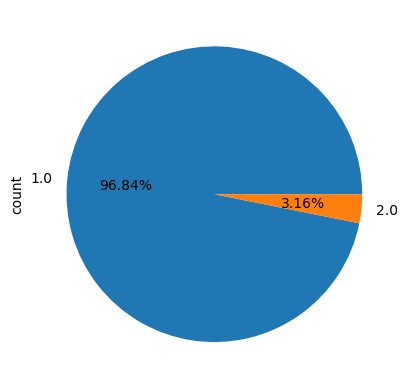

In [40]:
#pie diagrams of-trip_type,payment_type,RatecodeId
greentaxi.trip_type.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

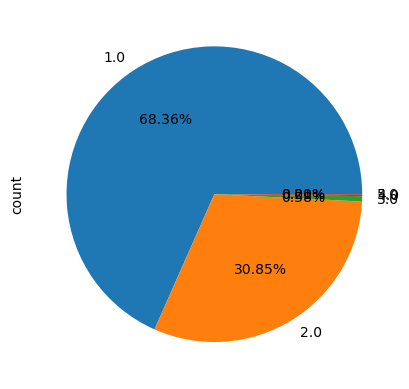

In [41]:
greentaxi.payment_type.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='count'>

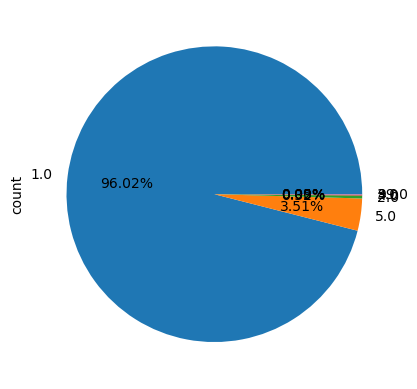

In [42]:
greentaxi.RatecodeID.value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='weekday'>

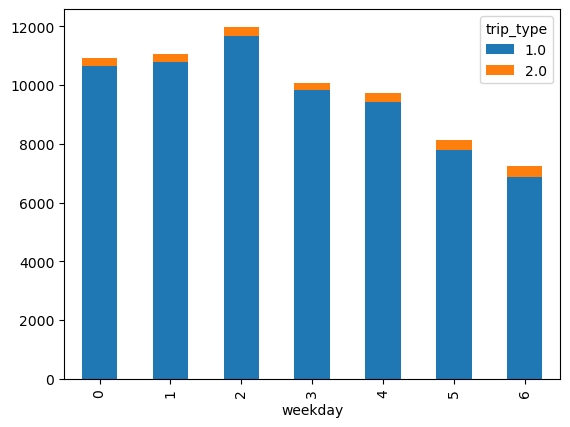

In [43]:
#stacked Bar diagram of weekdayand trip_type,weekday&payment_type,hour and payment_type
pd.crosstab(greentaxi.weekday,greentaxi.trip_type).plot(kind='bar',stacked=True)

<Axes: xlabel='weekday'>

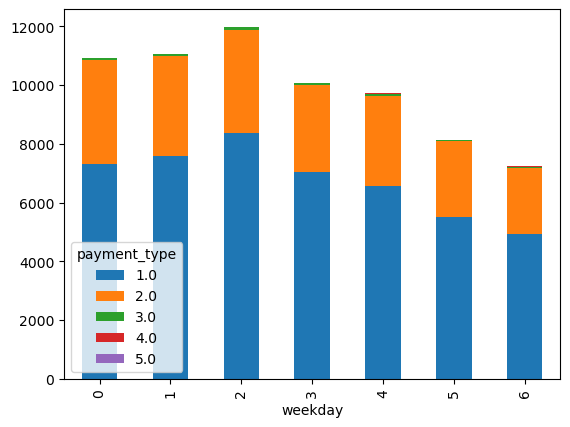

In [44]:
pd.crosstab(greentaxi.weekday,greentaxi.payment_type).plot(kind='bar',stacked=True)

<Axes: xlabel='hourofday'>

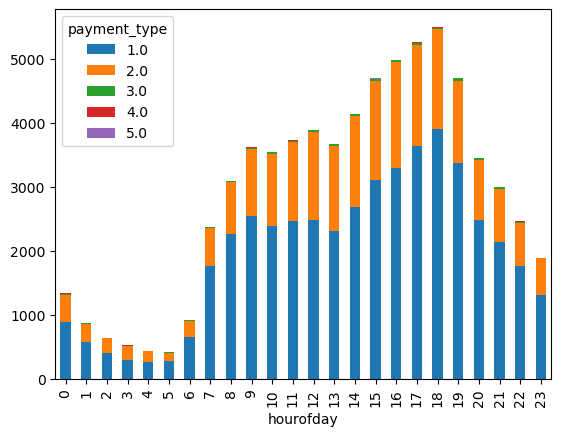

In [45]:
pd.crosstab(greentaxi.hourofday,greentaxi.payment_type).plot(kind='bar',stacked=True)

In [46]:
#groupby() mean forfollowing : weekday& total_amount,hour&total_amount,payment_type&totalamount
greentaxi.total_amount.groupby(greentaxi.weekday).mean()

weekday
0    22.877701
1    23.908406
2    24.135164
3    24.015407
4    23.763881
5    23.861000
6    24.365744
Name: total_amount, dtype: float64

In [47]:
greentaxi.total_amount.groupby(greentaxi.hourofday).mean()

hourofday
0     23.515759
1     23.969381
2     25.666543
3     27.938168
4     29.177699
5     32.225821
6     22.522634
7     22.075034
8     22.409683
9     23.088431
10    23.589651
11    23.561132
12    23.328017
13    23.481782
14    23.229157
15    23.164769
16    24.449924
17    24.385861
18    24.317724
19    23.859717
20    22.973994
21    24.152754
22    26.247944
23    24.327289
Name: total_amount, dtype: float64

In [48]:
greentaxi.total_amount.groupby(greentaxi.payment_type).mean()

payment_type
1.0    25.780425
2.0    19.963180
3.0     5.431393
4.0     4.038542
5.0     4.500000
Name: total_amount, dtype: float64

In [49]:
#groupby() mean for following:weekday & trip_duration,hour & trip_duration, payment_typ & trip_duration
greentaxi.trip_duration.groupby(greentaxi.weekday).mean()

weekday
0    18.102442
1    19.206054
2    20.190806
3    20.043437
4    20.436111
5    22.531876
6    20.442245
Name: trip_duration, dtype: float64

In [50]:
greentaxi.trip_duration.groupby(greentaxi.hourofday).mean()

hourofday
0     42.793169
1     19.300477
2     21.524755
3     13.562214
4     11.896963
5     13.901771
6     16.319508
7     21.879440
8     21.502882
9     18.991220
10    18.383286
11    19.524336
12    19.878787
13    21.181180
14    20.780857
15    22.732264
16    20.811883
17    19.568254
18    18.396692
19    18.400921
20    18.956820
21    17.760565
22    17.970811
23    17.491350
Name: trip_duration, dtype: float64

In [51]:
greentaxi.trip_duration.groupby(greentaxi.payment_type).mean()

payment_type
1.0    20.188720
2.0    19.918320
3.0    11.054270
4.0     3.969560
5.0     0.533333
Name: trip_duration, dtype: float64

# Hypothesis Testing

In [52]:
#testnull average total_amount of different trip_type is equal
greentaxi.total_amount.groupby(greentaxi.trip_type).mean()

trip_type
1.0    23.352330
2.0    38.242895
Name: total_amount, dtype: float64

In [53]:
greentaxi.total_amount.groupby(greentaxi.trip_type).var()

trip_type
1.0     268.737906
2.0    1697.012919
Name: total_amount, dtype: float64

In [54]:
#null-there is no significance difference in average amount of total_amount of trip_type 1 & 2
#alt-there is significance difference in average amount of total_amount of trip_type 1 & 2

In [55]:
ones=greentaxi[greentaxi.trip_type==1.0]
twos=greentaxi[greentaxi.trip_type==2.0]

In [56]:
from scipy.stats import ttest_ind
ttest_ind(ones.total_amount,twos.total_amount,equal_var=False)
#since pvalue=5.457304023638798e-60 is lessthan 0.05,reject null

TtestResult(statistic=-16.84526324273241, pvalue=5.457304023638798e-60, df=2204.5760590335676)

In [57]:
greentaxi.tip_amount.groupby(greentaxi.trip_type).var()

trip_type
1.0    14.350393
2.0    78.419367
Name: tip_amount, dtype: float64

In [58]:
#null-there is no significance difference in average tip_amount of trip_type 1 & 2
#alt-there is significance difference in average tip_amount of trip_type 1 & 2

In [59]:
# Test Null Average tip_amount of different trip_type is equal
ttest_ind(ones.tip_amount,twos.tip_amount,equal_var=False)
#since pvalue=0.0010745858666445013 is lessthan 0.05,reject null

TtestResult(statistic=-3.27456904334513, pvalue=0.0010745858666445013, df=2208.098340550297)

In [60]:
# Test Null Average total_amount for different weekday equal
greentaxi.total_amount.groupby(greentaxi.weekday).mean()

weekday
0    22.877701
1    23.908406
2    24.135164
3    24.015407
4    23.763881
5    23.861000
6    24.365744
Name: total_amount, dtype: float64

In [61]:
zero=greentaxi[greentaxi.weekday==0]
one=greentaxi[greentaxi.weekday==1]
two=greentaxi[greentaxi.weekday==2]
three=greentaxi[greentaxi.weekday==3]
four=greentaxi[greentaxi.weekday==4]
five=greentaxi[greentaxi.weekday==5]
six=greentaxi[greentaxi.weekday==6]

In [62]:
from scipy.stats import f_oneway

In [63]:
f_oneway(zero.total_amount,one.total_amount,two.total_amount,three.total_amount,four.total_amount,five.total_amount,six.total_amount)
#since pvalue=1.5781665738843715e-07 is lessthan 0.05,reject null

F_onewayResult(statistic=7.057962027034131, pvalue=1.5781665738843715e-07)

In [64]:
# Test Null Average tip_amount for different weekday equal
greentaxi.tip_amount.groupby(greentaxi.weekday).mean()

weekday
0    2.267933
1    2.408225
2    2.485913
3    2.510017
4    2.325503
5    2.398024
6    2.513699
Name: tip_amount, dtype: float64

In [65]:
#null-there is no significance difference in average tip_amount of weekday 0,1,2,3,4,5,6
#alt-there is significance difference in average tip_amount of weekday 0,1,2,3,4,5,6

greentaxi.tip_amount.groupby(greentaxi.weekday).var()

In [66]:
f_oneway(zero.tip_amount,one.tip_amount,two.tip_amount,three.tip_amount,four.tip_amount,five.tip_amount,six.tip_amount)
#since pvalue=1.1035304312725308e-05 is lessthan 0.05,reject null

F_onewayResult(statistic=5.481926987405262, pvalue=1.1035304312725308e-05)

In [67]:
# Test Null No Association between trip_type and payment_type
pd.crosstab(greentaxi.trip_type,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
trip_type,,,,,
1.0,45800,20679,378,133,1
2.0,1490,658,24,11,0


In [68]:
#null- there is no association between both variables
#null- there is association between both variables

In [69]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(greentaxi.trip_type,greentaxi.payment_type))
#since pvalue=0.0004385012882035308 is lessthan 0.05,reject null

Chi2ContingencyResult(statistic=20.285910588961, pvalue=0.0004385012882035308, dof=4, expected_freq=array([[4.57976175e+04, 2.06636448e+04, 3.89313644e+02, 1.39455634e+02,
        9.68441900e-01],
       [1.49238254e+03, 6.73355177e+02, 1.26863561e+01, 4.54436638e+00,
        3.15580999e-02]]))

In [70]:
# Test Null No Association between RatecodeID and payment_type
pd.crosstab(greentaxi.RatecodeID,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
RatecodeID,,,,,
1.0,45524,20410,358,131,1
2.0,138,68,14,0,0
3.0,22,7,4,1,0
4.0,38,24,0,1,0
5.0,1565,828,26,11,0
99.0,3,0,0,0,0


In [71]:
#null- there is no association between both variables
#null- there is association between both variables

In [72]:
chi2_contingency(pd.crosstab(greentaxi.RatecodeID,greentaxi.payment_type))
#since pvalue=3.2670230054629802e-43 is lessthan 0.05,reject null

Chi2ContingencyResult(statistic=257.646461298014, pvalue=3.2670230054629802e-43, dof=20, expected_freq=array([[4.54099945e+04, 2.04887514e+04, 3.86018562e+02, 1.38275306e+02,
        9.60245179e-01],
       [1.50400439e+02, 6.78598896e+01, 1.27851505e+00, 4.57975540e-01,
        3.18038569e-03],
       [2.32437043e+01, 1.04874375e+01, 1.97588689e-01, 7.07780380e-02,
        4.91514153e-04],
       [4.30692168e+01, 1.94326047e+01, 3.66120219e-01, 1.31147541e-01,
        9.10746812e-04],
       [1.66124122e+03, 7.49543326e+02, 1.41217799e+01, 5.05854801e+00,
        3.51288056e-02],
       [2.05091508e+00, 9.25362130e-01, 1.74342961e-02, 6.24512100e-03,
        4.33688958e-05]]))

In [73]:
# Test Null No Association between weekday and payment_type
pd.crosstab(greentaxi.weekday,greentaxi.payment_type)

payment_type,1.0,2.0,3.0,4.0,5.0
weekday,,,,,
0,7296,3552,60,26,0
1,7577,3402,61,22,0
2,8363,3515,81,21,0
3,7049,2959,61,15,1
4,6551,3085,61,40,0
5,5515,2573,46,10,0
6,4939,2251,32,10,0


In [74]:
#null- there is no association between both variables
#null- there is association between both variables

In [75]:
chi2_contingency(pd.crosstab(greentaxi.weekday,greentaxi.payment_type))
#since pvalue=4.532248995318973e-08 is lessthan 0.05,reject null

Chi2ContingencyResult(statistic=80.80132526421853, pvalue=4.532248995318973e-08, dof=24, expected_freq=array([[7.47490184e+03, 3.37263651e+03, 6.35421979e+01, 2.27613843e+01,
        1.58065169e-01],
       [7.56240755e+03, 3.41211863e+03, 6.42860612e+01, 2.30278428e+01,
        1.59915575e-01],
       [8.18998757e+03, 3.69527944e+03, 6.96209559e+01, 2.49388499e+01,
        1.73186457e-01],
       [6.89449287e+03, 3.11075903e+03, 5.86082921e+01, 2.09940151e+01,
        1.45791771e-01],
       [6.65658672e+03, 3.00341702e+03, 5.65859138e+01, 2.02695811e+01,
        1.40760980e-01],
       [5.56755081e+03, 2.51204973e+03, 4.73283025e+01, 1.69534218e+01,
        1.17732096e-01],
       [4.94407263e+03, 2.23073964e+03, 4.20282765e+01, 1.50549050e+01,
        1.04547952e-01]]))

In [76]:
# Test Null No Association between weekday and trip_type
pd.crosstab(greentaxi.weekday,greentaxi.trip_type)

trip_type,1.0,2.0
weekday,,
0,10635,299
1,10775,287
2,11679,301
3,9839,246
4,9425,312
5,7782,362
6,6856,376


In [77]:
pd.crosstab(greentaxi.trip_type,greentaxi.weekday)

weekday,0,1,2,3,4,5,6
trip_type,,,,,,,
1.0,10635,10775,11679,9839,9425,7782,6856
2.0,299,287,301,246,312,362,376


In [78]:
#null- there is no association between both variables
#null- there is association between both variables

In [79]:
chi2_contingency(pd.crosstab(greentaxi.weekday,greentaxi.trip_type))
#since pvalue=3.458694063594574e-39 is lessthan 0.05,reject null

Chi2ContingencyResult(statistic=194.0751725639184, pvalue=3.458694063594574e-39, dof=6, expected_freq=array([[10588.94373609,   345.05626391],
       [10712.9042993 ,   349.0957007 ],
       [11601.93396363,   378.06603637],
       [ 9766.73656287,   318.26343713],
       [ 9429.71878162,   307.28121838],
       [ 7886.99083471,   257.00916529],
       [ 7003.77182178,   228.22817822]]))

In [80]:
greentaxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration',
       'weekday', 'hourofday'],
      dtype='object')

In [81]:
#split data into numericcols and object cols
numcols=greentaxi[[ 'trip_distance', 'fare_amount', 'extra', 'mta_tax','tip_amount', 'tolls_amount',
                   'improvement_surcharge','congestion_surcharge','trip_duration']]

In [82]:
objcols=greentaxi[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type', 'trip_type','weekday','hourofday']]

In [83]:
numcols.head()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_duration
0,6.99,28.90,1.0,0.5,0.00,0.00,1.0,0.00,13.266667
1,6.60,30.30,1.0,0.5,5.00,0.00,1.0,2.75,20.366667
2,1.34,9.30,1.0,0.5,2.36,0.00,1.0,0.00,6.883333
3,7.79,22.73,0.0,0.0,2.29,6.55,1.0,0.00,20.450000
4,0.70,6.50,1.0,0.5,0.00,0.00,1.0,0.00,3.466667


In [84]:
objcols.head()

,store_and_fwd_flag,RatecodeID,passenger_count,payment_type,trip_type,weekday,hourofday
0,N,1.0,1.0,1.0,1.0,0,1
1,N,1.0,1.0,1.0,1.0,0,0
2,N,1.0,1.0,1.0,1.0,0,0
3,N,5.0,1.0,1.0,1.0,0,0
4,N,1.0,1.0,2.0,1.0,0,0


In [85]:
objcols_dummy=pd.get_dummies(objcols,columns=['store_and_fwd_flag','RatecodeID','passenger_count','payment_type', 'trip_type','weekday','hourofday'])

In [86]:
x=pd.concat([numcols,objcols_dummy],axis=1)

In [87]:
y=greentaxi.total_amount

<Axes: xlabel='total_amount', ylabel='Count'>

<Figure size 3000x1500 with 0 Axes>

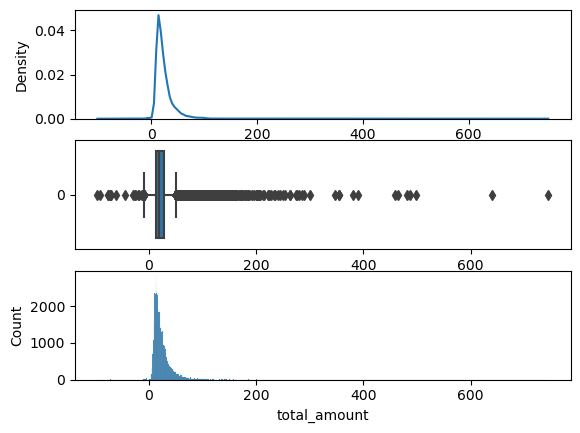

In [88]:
#hist,box,&density curve-y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.boxplot(y,orient='h',ax=ax[1])
sns.histplot(y,ax=ax[2])

<Axes: ylabel='Density'>

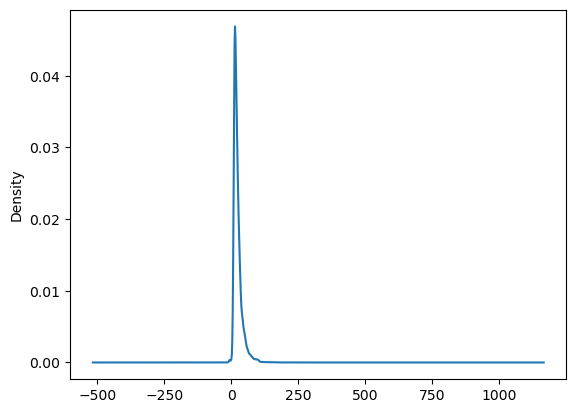

In [89]:
y.plot(kind='density')

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: Runtime

<Axes: xlabel='total_amount', ylabel='Count'>

<Figure size 3000x1500 with 0 Axes>

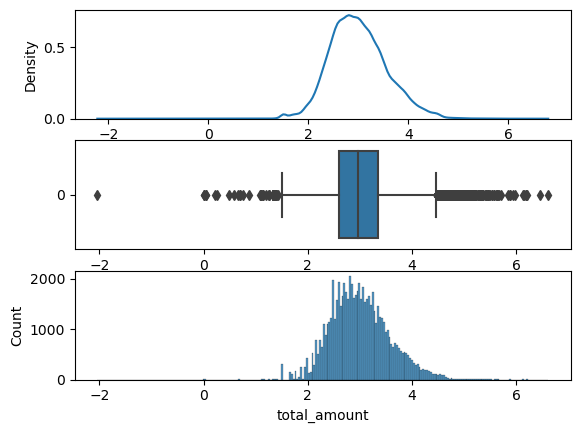

In [90]:
#hist,box,&density curve-y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),orient='h',ax=ax[1])
sns.histplot(np.log(y),ax=ax[2])
#logarithm transformation

<Axes: >

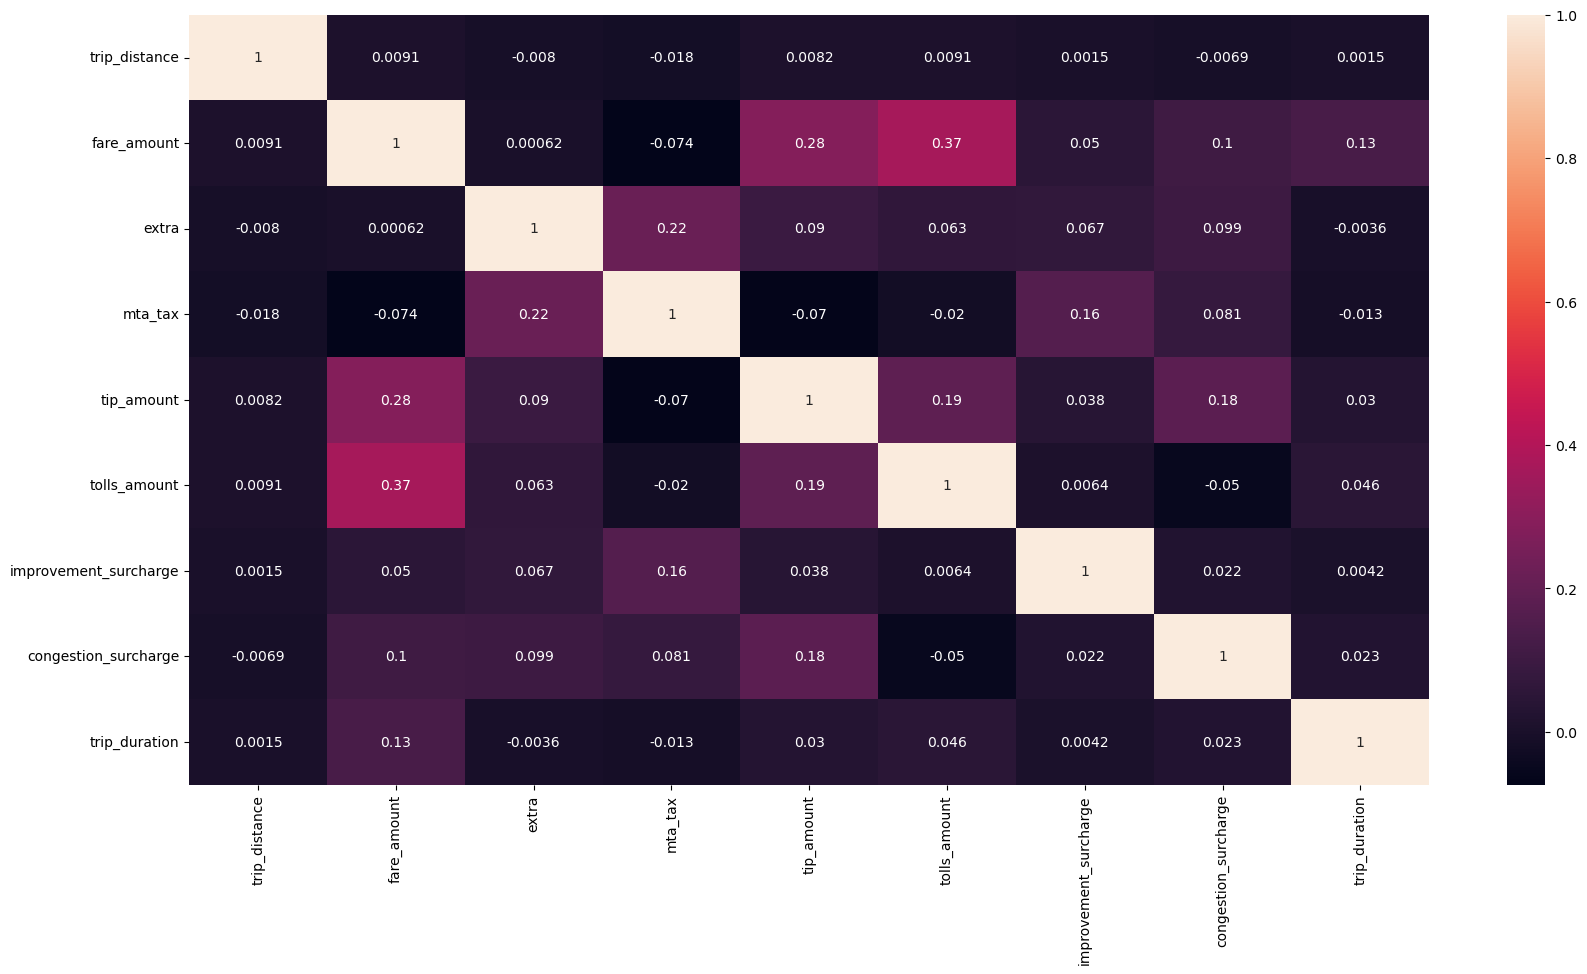

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(numcols.corr(),annot=True)

In [92]:
numcols2=numcols

In [93]:
numcols2['total_amount']=greentaxi.total_amount

C:\Users\Eswar Aditya\AppData\Local\Temp\ipykernel_19048\3269730445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcols2['total_amount']=greentaxi.total_amount


x.info()

In [94]:
x=x.drop('fare_amount',axis=1)

# Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
reg=LinearRegression()

In [97]:
regmodel=reg.fit(x,y)

In [98]:
regmodel.score(x,y)

0.46153609909092563

In [99]:
regpredict=regmodel.predict(x)

In [100]:
regresid=y-regpredict

In [101]:
np.sqrt(np.mean(regresid**2)) # rmse

13.138104982545144

In [102]:
greentaxi.total_amount.describe()

count    69174.000000
mean        23.822248
std         17.904309
min        -96.000000
25%         13.500000
50%         19.200000
75%         28.460000
max        744.950000
Name: total_amount, dtype: float64

# Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
tree=DecisionTreeRegressor(max_depth=13)

In [120]:
treemodel=tree.fit(x,y)

In [121]:
treemodel.score(x,y)

0.9481231177288694

In [122]:
treepredict=tree.predict(x)

In [123]:
treeresid=y-treepredict

In [124]:
np.sqrt(np.mean(treeresid**2))

4.077945010073083

# Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
rf=RandomForestRegressor(max_depth=12)

In [146]:
rfmodel=rf.fit(x,y)

In [147]:
rfmodel.score(x,y)

0.9345981198869919

In [148]:
rfpredict=rf.predict(x)

In [149]:
rfresid=y-rfpredict

In [150]:
np.sqrt(np.mean(rfresid**2))

4.578777582821636

# GBM

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

In [152]:
gbm=GradientBoostingRegressor()

In [153]:
gbmmodel=gbm.fit(x,y)

In [154]:
gbmmodel.score(x,y)

0.866054530776977

In [155]:
gbmpredict=gbmmodel.predict(x)

In [156]:
gbmresid=y-gbmpredict

In [157]:
np.sqrt(np.mean(gbmresid**2))

6.552672238057944

# SVR

In [158]:
from sklearn.svm import SVR

In [159]:
svr=SVR()

In [160]:
svrmodel=svr.fit(x,y)

In [161]:
svrmodel.fit(x,y)

SVR()

In [166]:
svrmodel.score(x,y)

0.2865765876051074

In [162]:
svrpredict=svr.predict(x)

In [163]:
svrresid=y-svrpredict

In [164]:
np.mean(np.mean(svrresid**2))

228.69476324700102